In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
odds = pd.read_csv("../../data/football_odds.csv", index_col=0)
odds.head()

,team,link,match_id,bookie,date,odds,hodds,hcap,gw,collected_at,sport
0,pontedera,https://oddspedia.com/api/v1/football/virtus-e...,pontedera_virtus_entella_2021-10-03,bet9ja,2021-10-03 15:30:00+00:00,0.307692,0.000000,0.00,2021-09-27 15:30:00+00:00,2010-01-01 00:00:00+00:00,football
1,pontedera,https://oddspedia.com/api/v1/football/virtus-e...,pontedera_virtus_entella_2021-10-03,1xstavka,2021-10-03 15:30:00+00:00,0.312500,0.000000,0.00,2021-09-27 15:30:00+00:00,2010-01-01 00:00:00+00:00,football
2,pontedera,https://oddspedia.com/api/v1/football/virtus-e...,pontedera_virtus_entella_2021-10-03,vbet,2021-10-03 15:30:00+00:00,0.300300,0.555556,0.25,2021-09-27 15:30:00+00:00,2010-01-01 00:00:00+00:00,football
3,pontedera,https://oddspedia.com/api/v1/football/virtus-e...,pontedera_virtus_entella_2021-10-03,marathonbet,2021-10-03 15:30:00+00:00,0.314465,0.552486,0.25,2021-09-27 15:30:00+00:00,2010-01-01 00:00:00+00:00,football
4,pontedera,https://oddspedia.com/api/v1/football/virtus-e...,pontedera_virtus_entella_2021-10-03,bet90,2021-10-03 15:30:00+00:00,0.312500,0.000000,0.00,2021-09-27 15:30:00+00:00,2010-01-01 00:00:00+00:00,football


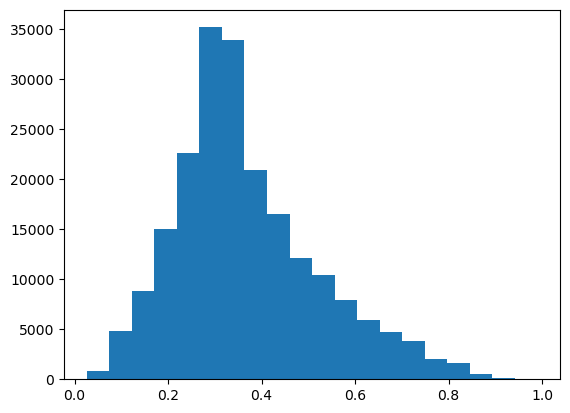

In [7]:
plt.hist(odds['odds'], bins=20);

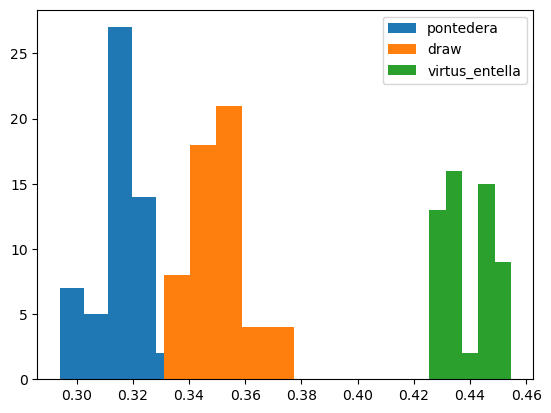

In [25]:
test_match = odds[odds['match_id']=='pontedera_virtus_entella_2021-10-03']
teams = test_match['team'].unique()
test_matches = []
for i, team in enumerate(teams):
    test_matches.append(test_match[test_match['team']==team])
    plt.hist(test_matches[i]['odds'], bins=5, label=team)
plt.legend();

In [31]:
odds_all = []
for match in test_matches:
    odds_all.append(match['odds'].min())
sum(odds_all)

1.05077538976701

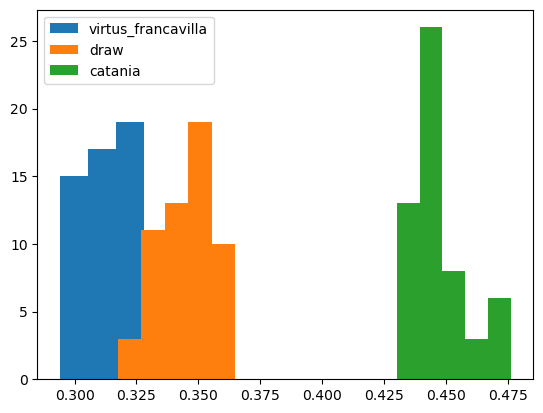

In [33]:
test_match = odds[odds['match_id']=='catania_virtus_francavilla_2021-10-17']
teams = test_match['team'].unique()
test_matches = []
for i, team in enumerate(teams):
    test_matches.append(test_match[test_match['team']==team])
    plt.hist(test_matches[i]['odds'], bins=5, label=team)
plt.legend();

In [34]:
odds_all = []
for match in test_matches:
    odds_all.append(match['odds'].min())
sum(odds_all)

1.041685491400861

In [46]:
matches = pd.read_csv('../../data/football_matches.csv', dtype={'manager_pt1': str, 'manager_pt2': str},\
                     index_col=0)
matches.head()

,pt1,pt2,score_pt1,score_pt2,ground,country,league,date,time,season,...,crosses_pt2,dribbles_completed_pt2,dribbles_pt2,possession_lost_pt2,duels_won_pt2,aerials_won_pt2,tackles_pt2,interceptions_pt2,clearances_pt2,attendance
0,palermo,lazio,5,1,Renzo Barbera,Italy,Italian Serie A,2012-02-19 19:45:00+00:00,19:45:00,2012,...,0,0,0,0,0,0,0,0,0,NaN
1,novara,atalanta,0,0,Silvio Piola,NaN,Italian Serie A,2012-02-19 14:00:00+00:00,14:00:00,2012,...,0,0,0,0,0,0,0,0,0,NaN
2,udinese,cagliari,0,0,Friuli,Italy,Italian Serie A,2012-02-19 19:45:00+00:00,19:45:00,2012,...,0,0,0,0,0,0,0,0,0,NaN
3,lecce,siena,4,1,Via del Mare,Italy,Italian Serie A,2012-02-19 11:30:00+00:00,11:30:00,2012,...,0,0,0,0,0,0,0,0,0,NaN
4,as_roma,parma,1,0,Olimpico,NaN,Italian Serie A,2012-02-19 14:00:00+00:00,14:00:00,2012,...,0,0,0,0,0,0,0,0,0,NaN


In [47]:
def set_up_data(df, past_data=True):
#     df['elo_home'] = 0
#     df['elo_away'] = 0
#     df['elo_diff'] = 0
#     df['prediction'] = 0
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df.sort_values(by='date', inplace=True)

    df.reset_index(inplace=True, drop=True)

    if past_data:
        df['correct'] = None

    df.reset_index(drop=True, inplace=True)
    print(f'Number of matches: {df.shape[0]}')

    return df

In [48]:
def get_result(row):
    if row['score_pt1'] > row['score_pt2']:
      return 1
    elif row['score_pt1'] < row['score_pt2']:
      return 0
    else:
      return 0.5

In [49]:
def duplicate_to_team_and_opponent(df):
    df = df[['match_id', 'league', 'date', 'pt1', 'pt2', 'result']]
    # df['result'] = df.apply(lambda x: update_FTR(x), axis=1)

    df_copy = df.copy()
    df = df.rename(columns={'pt1': 'team', 'pt2': 'opponent'})
    df_copy = df_copy.rename(columns={'pt2': 'team', 'pt1': 'opponent'})
    # print(df_copy.head())
#     df_copy['elo_diff'] = df_copy['elo_diff'] * -1
    df_copy['result'] = 1 - df_copy['result']
    df_copy = df_copy[['match_id', 'league', 'date', 'team', 'opponent', 'result'
                        ]]
    df.loc[:, 'home'] = 1
    df_copy.loc[:, 'home'] = 0
    df = pd.concat([df, df_copy])
    df.sort_values(by='date', inplace=True)

    return df

In [50]:
matches = set_up_data(matches)
matches['result'] = matches.apply(lambda x: get_result(x), axis=1)

Number of matches: 37237


In [51]:
matches = duplicate_to_team_and_opponent(matches)

In [52]:
matches.head()

,match_id,league,date,team,opponent,result,home
0,atalanta_bologna_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,atalanta,bologna,1.0,1
5,l_r_vicenza_sampdoria_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,l_r_vicenza,sampdoria,0.0,0
6,milan_piacenza_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,milan,piacenza,0.5,0
7,empoli_roma_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,roma,empoli,1.0,0
8,fiorentina_udinese_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,fiorentina,udinese,1.0,0


## Combining Odds and Matches
1. Get lowest odds for each match (best odds from a betting perspective). Group by match_id, then team, min aggregation.
2. Self join odds table on match_id twice to get each team and draw odds.
3. Join to matches table.

In [63]:
odds_group = odds.groupby(by=['match_id', 'team'])
odds_group = odds_group.min().reset_index()
# odds_group = pd.DataFrame(odds_group)

In [64]:
odds_group.head()

,match_id,team,link,bookie,date,odds,hodds,hcap,gw,collected_at,sport
0,ac_milan_as_roma_2021-10-31,ac_milan,https://oddspedia.com/api/v1/football/ac-milan...,10bet,2021-10-31 19:45:00+00:00,0.312500,0.0,0.0,2021-10-25 19:45:00+00:00,2010-01-01 00:00:00+00:00,football
1,ac_milan_as_roma_2021-10-31,as_roma,https://oddspedia.com/api/v1/football/ac-milan...,10bet,2021-10-31 19:45:00+00:00,0.408163,0.0,0.0,2021-10-25 19:45:00+00:00,2010-01-01 00:00:00+00:00,football
2,ac_milan_as_roma_2021-10-31,draw,https://oddspedia.com/api/v1/football/ac-milan...,10bet,2021-10-31 19:45:00+00:00,0.265252,0.0,0.0,2021-10-25 19:45:00+00:00,2010-01-01 00:00:00+00:00,football
3,ac_milan_as_roma_2022-01-06,ac_milan,https://oddspedia.com/api/v1/football/ac-milan...,1xbet,2022-01-06 17:30:00+00:00,0.411523,0.0,0.0,2022-01-03 17:30:00+00:00,2010-01-01 00:00:00+00:00,football
4,ac_milan_as_roma_2022-01-06,as_roma,https://oddspedia.com/api/v1/football/ac-milan...,1xbet,2022-01-06 17:30:00+00:00,0.270270,0.0,0.0,2022-01-03 17:30:00+00:00,2010-01-01 00:00:00+00:00,football


In [84]:
value_counts = odds_group['match_id'].value_counts()
value_counts = pd.DataFrame(value_counts).reset_index()
three_odds = value_counts[value_counts['match_id']==3]
three_odds = three_odds['index'].to_list()

In [87]:
odds_group = odds_group[odds_group['match_id'].isin(three_odds)].reset_index(drop=True)
odds_group.head()

,match_id,team,link,bookie,date,odds,hodds,hcap,gw,collected_at,sport
0,ac_milan_as_roma_2021-10-31,ac_milan,https://oddspedia.com/api/v1/football/ac-milan...,10bet,2021-10-31 19:45:00+00:00,0.312500,0.0,0.0,2021-10-25 19:45:00+00:00,2010-01-01 00:00:00+00:00,football
1,ac_milan_as_roma_2021-10-31,as_roma,https://oddspedia.com/api/v1/football/ac-milan...,10bet,2021-10-31 19:45:00+00:00,0.408163,0.0,0.0,2021-10-25 19:45:00+00:00,2010-01-01 00:00:00+00:00,football
2,ac_milan_as_roma_2021-10-31,draw,https://oddspedia.com/api/v1/football/ac-milan...,10bet,2021-10-31 19:45:00+00:00,0.265252,0.0,0.0,2021-10-25 19:45:00+00:00,2010-01-01 00:00:00+00:00,football
3,ac_milan_as_roma_2022-01-06,ac_milan,https://oddspedia.com/api/v1/football/ac-milan...,1xbet,2022-01-06 17:30:00+00:00,0.411523,0.0,0.0,2022-01-03 17:30:00+00:00,2010-01-01 00:00:00+00:00,football
4,ac_milan_as_roma_2022-01-06,as_roma,https://oddspedia.com/api/v1/football/ac-milan...,1xbet,2022-01-06 17:30:00+00:00,0.270270,0.0,0.0,2022-01-03 17:30:00+00:00,2010-01-01 00:00:00+00:00,football


In [88]:
odds_group.shape

(2307, 11)

/var/folders/bl/xbg_536n2_n123s38z4hxbx00000gn/T/ipykernel_46270/2564782218.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  odds_group_hist = odds_group.groupby(by=['match_id']).sum().reset_index()


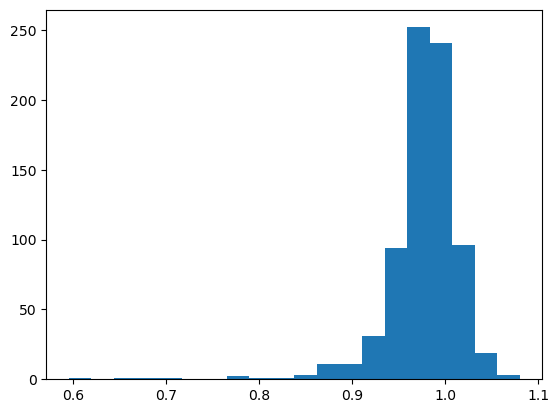

In [89]:
odds_group_hist = odds_group.groupby(by=['match_id']).sum().reset_index()
plt.hist(odds_group_hist['odds'], bins=20);

In [117]:
odds_group_cut = odds_group[['match_id', 'team', 'odds']].reset_index(drop=True)
odds_group_cut.head()
# combined = odds_group_cut.merge(matches, on=['match_id'])
# combined = pd.concat([odds_group_cut, matches], axis=1, keys=['match_id'])
# combined.head()

,match_id,team,odds
0,ac_milan_as_roma_2021-10-31,ac_milan,0.312500
1,ac_milan_as_roma_2021-10-31,as_roma,0.408163
2,ac_milan_as_roma_2021-10-31,draw,0.265252
3,ac_milan_as_roma_2022-01-06,ac_milan,0.411523
4,ac_milan_as_roma_2022-01-06,as_roma,0.270270


In [118]:
matches.head()

,match_id,league,date,team,opponent,result,home
0,atalanta_bologna_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,atalanta,bologna,1.0,1
1,l_r_vicenza_sampdoria_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,l_r_vicenza,sampdoria,0.0,0
2,milan_piacenza_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,milan,piacenza,0.5,0
3,empoli_roma_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,roma,empoli,1.0,0
4,fiorentina_udinese_1997-08-31,Serie A,1997-08-31 16:00:00+00:00,fiorentina,udinese,1.0,0


In [134]:
test = pd.merge(matches, odds_group_cut, left_on=['match_id', 'team'],
                                           right_on=['match_id', 'team'])
test.rename(columns={'odds': 'team_odds'}, inplace=True)
test.head()

,match_id,league,date,team,opponent,result,home,team_odds
0,pordenone_calcio_spezia_2021-08-13,Italian Coppa Italia,2021-08-13 15:45:00+00:00,spezia,pordenone_calcio,1.0,0,0.389105
1,pordenone_calcio_spezia_2021-08-13,Italian Coppa Italia,2021-08-13 15:45:00+00:00,pordenone_calcio,spezia,0.0,1,0.321543
2,genoa_perugia_2021-08-13,Italian Coppa Italia,2021-08-13 16:00:00+00:00,perugia,genoa,0.0,0,0.170068
3,genoa_perugia_2021-08-13,Italian Coppa Italia,2021-08-13 16:00:00+00:00,genoa,perugia,1.0,1,0.591366
4,ascoli_udinese_2021-08-13,Italian Coppa Italia,2021-08-13 18:45:00+00:00,udinese,ascoli,1.0,1,0.694444


In [135]:
test = pd.merge(test, odds_group_cut, left_on=['match_id', 'opponent'],
                                           right_on=['match_id', 'team'])
test.rename(columns={'odds': 'opponent_odds', 'team_x': 'team'}, inplace=True)
test.drop(['team_y'], axis=1, inplace=True)
test.head()

,match_id,league,date,team,opponent,result,home,team_odds,opponent_odds
0,pordenone_calcio_spezia_2021-08-13,Italian Coppa Italia,2021-08-13 15:45:00+00:00,spezia,pordenone_calcio,1.0,0,0.389105,0.321543
1,pordenone_calcio_spezia_2021-08-13,Italian Coppa Italia,2021-08-13 15:45:00+00:00,pordenone_calcio,spezia,0.0,1,0.321543,0.389105
2,genoa_perugia_2021-08-13,Italian Coppa Italia,2021-08-13 16:00:00+00:00,perugia,genoa,0.0,0,0.170068,0.591366
3,genoa_perugia_2021-08-13,Italian Coppa Italia,2021-08-13 16:00:00+00:00,genoa,perugia,1.0,1,0.591366,0.170068
4,ascoli_udinese_2021-08-13,Italian Coppa Italia,2021-08-13 18:45:00+00:00,udinese,ascoli,1.0,1,0.694444,0.102041


In [136]:
draws = odds_group_cut[odds_group_cut['team']=='draw']
# draws
test = pd.merge(test, draws, left_on=['match_id'],
                               right_on=['match_id'])
test.rename(columns={'odds': 'draw_odds', 'team_x': 'team'}, inplace=True)
test.drop(['team_y'], axis=1, inplace=True)
test.head()

,match_id,league,date,team,opponent,result,home,team_odds,opponent_odds,draw_odds
0,pordenone_calcio_spezia_2021-08-13,Italian Coppa Italia,2021-08-13 15:45:00+00:00,spezia,pordenone_calcio,1.0,0,0.389105,0.321543,0.286533
1,pordenone_calcio_spezia_2021-08-13,Italian Coppa Italia,2021-08-13 15:45:00+00:00,pordenone_calcio,spezia,0.0,1,0.321543,0.389105,0.286533
2,genoa_perugia_2021-08-13,Italian Coppa Italia,2021-08-13 16:00:00+00:00,perugia,genoa,0.0,0,0.170068,0.591366,0.231481
3,genoa_perugia_2021-08-13,Italian Coppa Italia,2021-08-13 16:00:00+00:00,genoa,perugia,1.0,1,0.591366,0.170068,0.231481
4,ascoli_udinese_2021-08-13,Italian Coppa Italia,2021-08-13 18:45:00+00:00,udinese,ascoli,1.0,1,0.694444,0.102041,0.203666


Write function to go over the three columns and return 1 if team odds max, 0 if opp and 0.5 if draw.
Compare to result column to see accuracy.